### Loading relevant packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from io import BytesIO
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering Data

### 1. Gathering WeRateDogs Twitter Archive

In [2]:
wrd_twitter = pd.read_csv('twitter-archive-enhanced.csv')
wrd_twitter.head(3)
wrd_twitter.to_csv('twitter_arch.csv')

### 2. Gathering Tweet Image Predictions

In [3]:
tweetimage_get = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
tweetimage = pd.read_csv(BytesIO(tweetimage_get.content), sep = '\t')
tweetimage.to_csv('image-predictions.tsv', sep='\t', )
tweetimage.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### 3. Gathering Additional Data From Twitter

In [5]:
# was not supposed to share the key details
consumer_key = 'XXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)
api

In [12]:
tweet_ids = wrd_twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [4]:
tweetdata = []
with open('tweet_json.txt', 'r') as readfile: 
    tweetjson = readfile.readline()
    while tweetjson:
        tweetdict = json.loads(tweetjson)
        tweetdata.append(tweetdict)
        tweetjson = readfile.readline()
        
twitterdata = pd.DataFrame.from_dict(tweetdata)
twitterdata.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

# Assessing data

### 1. Assessing WeRateDogs twitter archive

In [6]:
#checking the data types
wrd_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#Check for null values
wrd_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
#Checking for duplicates
wrd_twitter[wrd_twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
# Checking names of the twitters
wrd_twitter['name'].value_counts()

#Check for names that start with a lowercase letter
lcnames = []
for row in wrd_twitter['name']:
    if row[0].islower():
        lcnames.append(row)
lcnames

['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [10]:
#Checking text and ratings for possible errors
wrd_twitter[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10
5,891087950875897856,Here we have a majestic great white breaching ...,13,10
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10
7,890729181411237888,When you watch your owner call another dog a g...,13,10
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10


In [11]:
#Checking numerator of ratings
wrd_twitter['rating_numerator'].value_counts().sort_values

<bound method Series.sort_values of 12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64>

In [12]:
#Checking denominator of ratings
wrd_twitter['rating_denominator'].value_counts().sort_values

<bound method Series.sort_values of 10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64>

### 2. Assessing additional data from Twitter

In [13]:
twitterdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [14]:
twitterdata.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

### 3. Assessing Tweet image predictions

In [15]:
#checking data types
tweetimage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
#checking for null values
tweetimage.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
#checking for duplicates
tweetimage[tweetimage.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues
### 1. Some tweets in additional data are "retweets
### 2. Some columns have all null values 
### 3.Timestamp should be datetime instead of object
### 4. Some names are 'None'or inappropriate namesCode
### 5. Some column headers have long characters. Shortening them can help with readability and easy 
### 6. Few non-decimal ratings are incorrectly assigned
### 7. Few decimal ratings are incorrectly assigned
### 8. Some ratings seem extreme and need to be investigated as possible outliers  
####    
### Tidiness issues
### 1. The three data sets should to be joined the make data easy for analysis. 
### 2. Dog stats, doggo', 'floofer', 'pupper', and 'puppo are in four columns. Could be combined to one column 

## Cleaning Data

In [244]:
# Make copies of the three datasets
wrd_twitter1 = wrd_twitter.copy()
tweetimage1 = tweetimage.copy()
twitterdata1 = twitterdata.copy()

### Define
### Tidiness 1. The three data sets are merged to prepare data for analysis. 
### Code

In [245]:
# merging the twitter data sets
twitter = pd.merge(twitterdata1, wrd_twitter1, left_on='id', right_on='tweet_id', how='left')

In [246]:
# merging the images to the other two data sets
twitter = pd.merge(twitter, tweetimage1, left_on='id', right_on='tweet_id', how='left')

### Test

In [247]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 60 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id_x          78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id_x            78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [248]:
twitter

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### Define
### Quality 1. Selecting data that are not just retweeted data to avoid duplication by removing rows that have non-empty retweeted_status_user_id.
### Code

In [249]:
twitter = twitter[twitter.retweeted_status_id.isnull()]

### Test

In [250]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 60 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2175 non-null object
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null object
id                               2175 non-null int64
id_str                           2175 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id_x          78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id_x            78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### Define
### Quality 2. Drop columns with all null values 
### Code

In [251]:
#Droping  column user, favorited, retweeted, contributors, coordinates, geo, place, quoted_status_id, and quoted status id str, 'retweeted_status'
twitter = twitter.drop(['contributors', 'coordinates', 'geo', 'place', 'quoted_status_id', 'quoted_status_id_str', 'retweeted_status', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' ], axis=1)

### Test

In [252]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 50 columns):
created_at                       2175 non-null object
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
id                               2175 non-null int64
id_str                           2175 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id_x          78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id_x            78 non-null float64
in_reply_to_user_id_str          78 non-null object
is_quote_status                  2175 non-null bool
lang                             2175 non-null object
possibly_sensitive               2117 non-n

### Define
### Quality 3. Timestamp should be datetime instead of object 
### Code

In [253]:
#Convert retweeted_status_timestamp variable into datetime format Code
twitter.timestamp = pd.to_datetime(twitter.timestamp)

### Test

In [254]:
twitter['timestamp'].dtype

dtype('<M8[ns]')

### Define
### Tidiness 2. Combining 'doggo', 'floofer', 'pupper', and 'puppo' into one column
### Code

In [255]:
# First replacing all 'None' with ''
twitter.doggo.replace('None', '', inplace=True)
twitter.floofer.replace('None', '', inplace=True)
twitter.pupper.replace('None', '', inplace=True)
twitter.puppo.replace('None', '', inplace=True)

# Replacing all 'Nan' with ''
twitter.doggo.replace(np.NaN, '', inplace=True)
twitter.floofer.replace(np.NaN, '', inplace=True)
twitter.pupper.replace(np.NaN, '', inplace=True)
twitter.puppo.replace(np.NaN, '', inplace=True)

# Seperating combined stages
twitter['stage'] = twitter.doggo + twitter.floofer + twitter.pupper + twitter.puppo
twitter.loc[twitter.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter.loc[twitter.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter.loc[twitter.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

### Test

In [256]:
#Checking to confirm the columns were combined successfully
twitter['stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [257]:
# Droping the columns doggo, floofer, pupper, and puppo 
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
twitter.head(5)

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,


### Define
### Quality 4. Dealing with incorrect names - Replace all 'None' and lower case names with a NaN
### Code

In [258]:
# Replace all 'None' in names with a NaN
twitter['name'].replace('None', np.nan, inplace = True)

# Replace dog names that start with lower case letters with NaN
twitter['name'].replace(lcnames, np.nan, inplace = True)

### Test

In [259]:
twitter.head()

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,


In [260]:
#Counting if replaced names still exist
count_ = 0
for row in twitter['name']:
    if row in lcnames or row == "None":
        count_a +=count_a
count_

0

### Define
### Quality 5: Reducing lengths of column headers such as in_reply_to_screen_name, in_reply_to_status_id_x, and possibly_sensitive_appealable to enhance readibility
### Code

In [261]:
twitter.rename(columns={'in_reply_to_screen_name': 'reply_to_screen', 'in_reply_to_status_id_x': 'reply_to_status', 'in_reply_to_status_id_str':'reply_to_status_id', 'tweet_id_x':'tweet_id', 'in_reply_to_status_id_y': 'reply_to_status', 'possibly_sensitive_appealable':'possibly_sensitive_appeal'}, inplace=True)

### Test

In [262]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 47 columns):
created_at                   2175 non-null object
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
id                           2175 non-null int64
id_str                       2175 non-null object
reply_to_screen              78 non-null object
reply_to_status              78 non-null float64
reply_to_status_id           78 non-null object
in_reply_to_user_id_x        78 non-null float64
in_reply_to_user_id_str      78 non-null object
is_quote_status              2175 non-null bool
lang                         2175 non-null object
possibly_sensitive           2117 non-null object
possibly_sensitive_appeal    2117 non-null object
quoted_

### Define
### Quality 6. Assigning ratings to non-decimal incorrectly assigned ratings
### Code

In [263]:
#Assigning blank rating to tweet with no rating
IDs = [810984652412424192]
for x in IDs:
    twitter.loc[(twitter.tweet_id==x), 'rating_numerator'] = np.nan
    twitter.loc[(twitter.tweet_id==x), 'rating_denominator'] = np.nan
    
    
#Assigning rating to incorrectly assigned imteger rating
IDs = [835246439529840640]
for x in IDs:
    twitter.loc[(twitter.tweet_id==x), 'rating_numerator'] = 13
    twitter.loc[(twitter.tweet_id==x), 'rating_denominator'] = 10

### Test

In [264]:
# Blank rating
twitter[twitter['tweet_id']==810984652412424192]

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,reply_to_screen,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
515,Mon Dec 19 23:06:23 +0000 2016,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810984648008466432, 'id_str'...",5927,False,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,810984652412424192,None,...,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,


In [265]:
# Integer rating
twitter[(twitter['tweet_id']==835246439529840640)]

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,reply_to_screen,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
312,Fri Feb 24 21:54:03 +0000 2017,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2259,False,@jonnysun @Lin_Manuel ok jomny I know you're e...,835246439529840640,835246439529840640,jonnysun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [266]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 47 columns):
created_at                   2175 non-null object
display_text_range           2175 non-null object
entities                     2175 non-null object
extended_entities            1994 non-null object
favorite_count               2175 non-null int64
favorited                    2175 non-null bool
full_text                    2175 non-null object
id                           2175 non-null int64
id_str                       2175 non-null object
reply_to_screen              78 non-null object
reply_to_status              78 non-null float64
reply_to_status_id           78 non-null object
in_reply_to_user_id_x        78 non-null float64
in_reply_to_user_id_str      78 non-null object
is_quote_status              2175 non-null bool
lang                         2175 non-null object
possibly_sensitive           2117 non-null object
possibly_sensitive_appeal    2117 non-null object
quoted_

### Define
### Quality 7. Extracting decimal value ratings that were incorrectly extracted 
### Code

In [267]:
# Extracting all rating_numerators correctly from text including those with decimals
ratings = twitter.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

# Extracting initial rating_numerator values to use in testing
Test_rating_numerator = twitter['rating_numerator']

# Replace rating_numerator with ratings
twitter.rating_numerator = ratings.astype(float)

### Test

In [268]:
twitter['Test_rating_numerator'] = Test_rating_numerator
twitter_copy = twitter.copy()
twitter_copy[twitter_copy['rating_numerator'] != twitter_copy['Test_rating_numerator']]
 

#Shows observations that have changed

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,reply_to_screen,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,Test_rating_numerator
44,Sat Jul 08 00:28:19 +0000 2017,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 883482838036860928, 'id_str'...",46860,False,This is Bella. She hopes her smile made you sm...,883482846933004288,883482846933004288,None,...,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,,5.0
312,Fri Feb 24 21:54:03 +0000 2017,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2259,False,@jonnysun @Lin_Manuel ok jomny I know you're e...,835246439529840640,835246439529840640,jonnysun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,13.0
515,Mon Dec 19 23:06:23 +0000 2016,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 810984648008466432, 'id_str'...",5927,False,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,810984652412424192,None,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,,NaN
694,Thu Oct 13 23:23:56 +0000 2016,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 786709075132383232, 'id_str'...",20296,False,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,786709082849828864,None,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,,75.0
762,Tue Sep 20 00:24:34 +0000 2016,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 778027018185240576, 'id_str'...",7320,False,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,778027034220126208,None,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,pupper,27.0
1687,Mon Dec 28 05:07:27 +0000 2015,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1803,False,I've been told there's a slight possibility he...,681340665377193984,681340665377193984,dog_rates,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,5.0
1710,Fri Dec 25 21:06:00 +0000 2015,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680494717491085312, 'id_str'...",1879,False,Here we have uncovered an entire battalion of ...,680494726643068929,680494726643068929,None,...,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,,26.0


### Define
### Quality 8: Excluding extreme ratings that are likely outliers using interquartile range method 
### Code

In [269]:
#Computing an aggregate rating (combo_rating) from which comparisons can be made
twitter['rating_combo']=twitter['rating_numerator']/twitter['rating_denominator']

In [279]:
# Dropping null rating combo
twitter.dropna(subset = ['rating_combo'],inplace = True)

#determining the 75th and 25th quartile
q75, q25 = np.percentile(twitter['rating_combo'], [75, 25])

#calculating value for determining interquartile range
int_quartile = q75 + 1.5*(q75+q25)

#Calculating interquartile range
upper, lower = q75+int_quartile, q25-int_quartile

#selecting only observations for which ratings are not extreme values
twitter_clean = twitter[twitter['rating_combo'] < upper]
twitter_clean

5.7 -3.5


,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,reply_to_screen,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,Test_rating_numerator,rating_combo
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,None,...,False,bagel,0.085851,False,banana,0.076110,False,,13.0,1.3
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,,13.0,1.3
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,,12.0,1.2
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,,13.0,1.3
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,,12.0,1.2
5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,None,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,,13.0,1.3
6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991426,None,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,,13.0,1.3
7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,890729181411237888,890729181411237888,None,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,,13.0,1.3
8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,890609185150312448,None,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,,13.0,1.3
9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,890240255349198849,None,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,14.0,1.4


### Test

In [280]:
twitter[twitter['rating_combo'] > upper]

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,reply_to_screen,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,Test_rating_numerator,rating_combo
187,Sat Apr 22 19:15:32 +0000 2017,"[14, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,320,False,@dhmontgomery We also gave snoop dogg a 420/10...,855862651834028034,855862651834028034,dhmontgomery,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,420.0,42.0
188,Sat Apr 22 19:05:32 +0000 2017,"[5, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4407,False,@s8n You tried very hard to portray this good ...,855860136149123072,855860136149123072,s8n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,666.0,66.6
289,Sat Mar 04 22:12:52 +0000 2017,"[12, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1824,False,@markhoppus 182/10,838150277551247360,838150277551247360,markhoppus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,182.0,18.2
312,Fri Feb 24 21:54:03 +0000 2017,"[22, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,2259,False,@jonnysun @Lin_Manuel ok jomny I know you're e...,835246439529840640,835246439529840640,jonnysun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,13.0,96.0
977,Mon Jul 04 15:00:45 +0000 2016,"[0, 54]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749850882955702272, 'id_str'...",5569,False,This is Atticus. He's quite simply America af....,749981277374128128,749981277374128128,None,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,,1776.0,177.6
2072,Sun Nov 29 05:52:33 +0000 2015,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670842759008411648, 'id_str'...",7989,False,After so many requests... here you go.\n\nGood...,670842764863651840,670842764863651840,None,...,False,accordion,0.094075,False,drumstick,0.061113,False,,420.0,42.0


## Storing the merged data

In [296]:
# Saving to a CSV file
twitter_clean.to_csv('twitter_archive_master.csv')

## Analysis and visualization

In [297]:
twitter_archives = pd.read_csv('twitter_archive_master.csv')
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 50 columns):
Unnamed: 0                   2168 non-null int64
created_at                   2168 non-null object
display_text_range           2168 non-null object
entities                     2168 non-null object
extended_entities            1991 non-null object
favorite_count               2168 non-null int64
favorited                    2168 non-null bool
full_text                    2168 non-null object
id                           2168 non-null int64
id_str                       2168 non-null int64
reply_to_screen              74 non-null object
reply_to_status              74 non-null float64
reply_to_status_id           74 non-null float64
in_reply_to_user_id_x        74 non-null float64
in_reply_to_user_id_str      74 non-null float64
is_quote_status              2168 non-null bool
lang                         2168 non-null object
possibly_sensitive           2114 non-null object
possibl

In [298]:
twitter_archives

,Unnamed: 0,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,Test_rating_numerator,rating_combo
0,0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,13.0,1.3
1,1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,13.0,1.3
2,2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,...,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,12.0,1.2
3,3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,13.0,1.3
4,4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,12.0,1.2
5,5,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,891087950875897856,891087950875897856,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,NaN,13.0,1.3
6,6,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,890971913173991426,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN,13.0,1.3
7,7,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,890729181411237888,890729181411237888,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,NaN,13.0,1.3
8,8,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,890609185150312448,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,NaN,13.0,1.3
9,9,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,890240255349198849,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,14.0,1.4


### Survey of favorites tweets and number of times they are retweeted

Text(0.5,1,'Favorite vs Retweet Count')

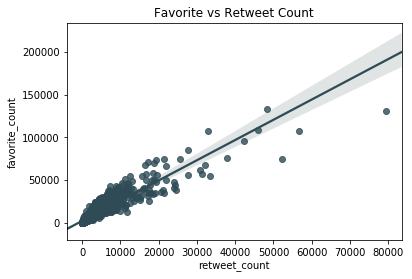

In [299]:
# plotting retweets against favorite counts
sns.set_palette("PuBuGn_d")
sns.regplot('retweet_count','favorite_count', data=twitter_archives)
plt.title('Favorite vs Retweet Count')

The number of retweets has a positive correlation with favorite count. This is expected as favorite tweets are more likely to be retweeted than unfavourite tweets

### Dog stage assessment

Text(0,0.5,'Frequency')

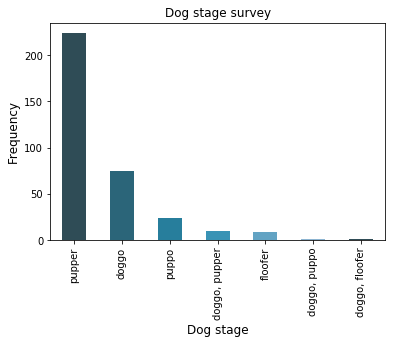

In [300]:
#Displaying the data using a bar chart
twitter_archives['stage'].value_counts().plot(kind='bar') 
plt.title('Dog stage survey')
plt.xlabel('Dog stage', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)


Pupper is most common while doggo-pupper is most common for doubly stage-tagged dogs

### Distribution of ratings

In [301]:
Dog_ratings = twitter_archives['rating_combo'].value_counts()
print(Dog_ratings)

1.200000    504
1.000000    444
1.100000    431
1.300000    307
0.900000    156
0.800000     98
0.700000     53
1.400000     43
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      7
0.000000      2
1.500000      1
1.250000      1
0.950000      1
0.975000      1
1.126000      1
0.636364      1
1.127000      1
1.350000      1
0.818182      1
1.700000      1
0.733333      1
Name: rating_combo, dtype: int64


12 was the highest number of rating given to while 14 seem like the maximum rating beyond which other ratings may be outliers.

### Dog stage with highest rating

In [302]:
# Finding the mean rating for each stat
r_count = twitter_archives.groupby(['stage']).mean()['rating_combo']
r_count

stage
doggo             1.185333
doggo, floofer    1.100000
doggo, pupper     1.110000
doggo, puppo      1.300000
floofer           1.188889
pupper            1.073781
puppo             1.204167
Name: rating_combo, dtype: float64

Puppo has the highest mean rating for single stage-stagged dogs while doggo-puppo actually has the highest mean rating